In [ ]:
# From predict.py
# Standard library imports
import os
import time
from glob import glob
from pathlib import Path

# Third party imports
import numpy as np
from tensorflow import keras

from hot_fair_utilities.georeferencing import georeference
from hot_fair_utilities.utils import remove_files
from hot_fair_utilities.inference.utils import open_images, save_mask

BATCH_SIZE = 8
IMAGE_SIZE = 256
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [19]:
# Model import
checkpoint_path = "/Users/azanchetta/fAIr-utilities/ramp-data/sample_2/train/model-checkpts/20231024-112134/model_20231024-112134_002_0.852.tf"
model = keras.models.load_model(checkpoint_path)
# model.summary()

In [ ]:
# model.summary()  # ... very verbose

In [ ]:
#  model visualisation
# import visualkeras # this is a cooler image visualisation
from keras.utils.vis_utils import plot_model
plot_model(model, to_file="model_plot.png", show_shapes=True, show_layer_names=True, expand_nested=True)

In [20]:
# test if GPU is accessed by tensorflow
import tensorflow as tf
tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [21]:
# trying to import more (pytorch) models
import torch

In [22]:
path_to_rn50unet = "/Users/azanchetta/fAIr_GPU/models_architectures/resnet50_unet_dg.pth.tar"
path_to_rn101dlv3 = "/Users/azanchetta/fAIr_GPU/models_architectures/resnet101_deeplabv3+_inria.pth.tar"
# model_rn50unet = torch.load(path_to_rn50unet)

model_rn50unet = torch.load(path_to_rn50unet, map_location=torch.device('cpu'))


In [23]:
type(model_rn50unet) # it's a dict

dict

In [ ]:
checkpoint_rn50unet = torch.load(path_to_rn50unet, map_location=torch.device('cpu'))
model_rn50unet = net()
model_rn50unet.load_state_dict(checkpoint_rn50unet['model_state_dict'])
# optimizer.load_state_dict(checkpoint_rn50unet['optimizer'])


# checkpoint = torch.load('filename.pth.tar')
# model.load_state_dict(checkpoint['state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer'])

# CheckPoint = torch.load(path)
# models.load_state_dict(CheckPoint['model_state_dict'])
# optimizers.load_state_dict(CheckPoint['optimizer_state_dict'])
# Epoch = CheckPoint['epoch']
# Loss = CheckPoint['loss']

In [ ]:
checkpoint_rn50unet['state_dict']

In [ ]:
checkpoint_rn50unet['optimizer']

## Trials on images plotting (input to model)

In [1]:
import matplotlib.pyplot as plt
from osgeo import gdal
import os
import numpy as np

In [2]:
print(os.getcwd())

/home/annazan/fAIr-utilities


In [27]:
# dataset = gdal.Open(r'ramp-data/1_Zanzibar/input/OAM-1277169-1083851-21.png')
# dataset = gdal.Open(r'outputs/4_Salvacion/prediction/OAM-443121-241594-19.tif')
# dataset = gdal.Open(r'outputs/model51_td364/prediction/OAM-312862-256652-19.tif')

In [30]:
print(dataset.RasterCount)

1


### with 1 band images

In [33]:
# imagge='outputs/4_Salvacion/prediction/OAM-443121-241594-19.tif'
imagge='outputs/model51_td364/prediction/OAM-312862-256652-19.tif'

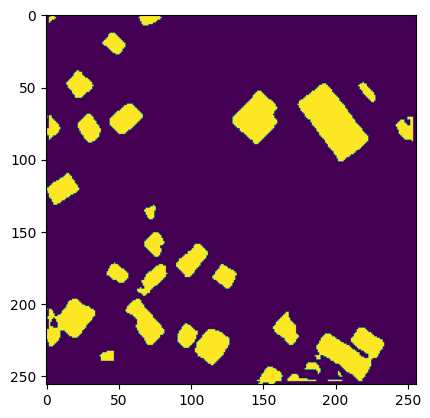

In [34]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread(imagge)
imgplot = plt.imshow(img)

In [ ]:
# ## WITH 1 BAND
# band1 = dataset.GetRasterBand(1)
# b1 = band1.ReadAsArray()

# img = np.dstack((b1))
# img.squeeze().permute(1,2,0)
# # f = plt.figure() 
# plt.imshow(img) 
# # plt.savefig('Tiff.png') 
# plt.show() 

### with 3 bands images

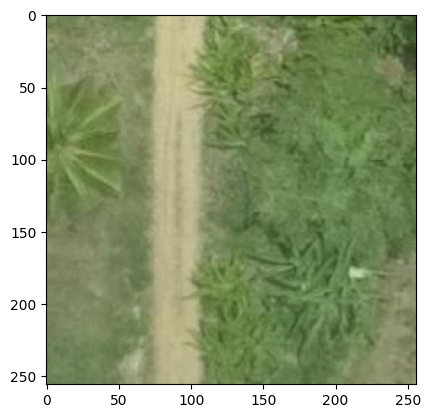

In [16]:
## WITH 3 BANDS
# since there are 3 bands 
# we store in 3 different variables 
band1 = dataset.GetRasterBand(1) # Red channel 
band2 = dataset.GetRasterBand(2) # Green channel 
band3 = dataset.GetRasterBand(3) # Blue channel

# reading the bands ar Numpy arrays
b1 = band1.ReadAsArray() 
b2 = band2.ReadAsArray() 
b3 = band3.ReadAsArray() 

# plotting the arrays using imshow()
img = np.dstack((b1, b2, b3)) 
# f = plt.figure() 
plt.imshow(img) 
# plt.savefig('Tiff.png') 
plt.show() 

## Plotting geojson

https://medium.com/@tmango/plotting-geojson-files-with-matplotlib-5ed87df570ab

In [35]:
import folium
import geopandas as gpd

In [36]:
# labels_file = "outputs/model51_td364/labels/OAM-312864-256652-19.geojson"
prediction_file = 'outputs/model51_td364/prediction/prediction.geojson'

In [6]:
import os
os.getcwd()

'/home/annazan/fAIr-utilities'

In [37]:
# df_image= gpd.read_file(labels_file)
df_image= gpd.read_file(prediction_file)

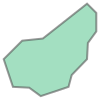

In [38]:
df_image['geometry'][1]

<AxesSubplot:>

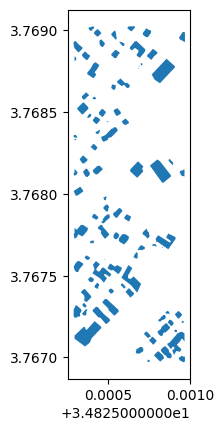

In [39]:
df_image.plot()

In [40]:
df_image.explore()

## plotting sat image and prediction on top

Shortcome: it is not possible unless you convert the tif image to df first

https://stackoverflow.com/questions/64589390/python-georasters-geotiff-image-into-geopandas-dataframe-or-pandas-dataframe

not bothering for now

In [42]:
chip='outputs/model51_td364/chips/OAM-312862-256652-19.tif'

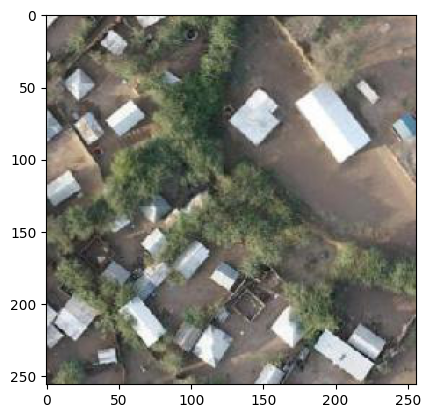

In [44]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img=mpimg.imread(chip)
imgplot = plt.imshow(img)

<AxesSubplot:>

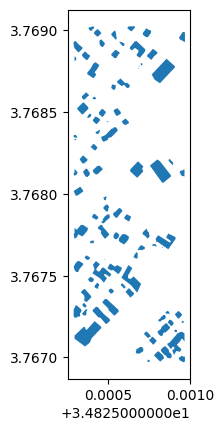

In [46]:
prediction_file = 'outputs/model51_td364/prediction/prediction.geojson'
prediction_image= gpd.read_file(prediction_file)
prediction_image.plot()

In [50]:
m = prediction_image.explore(name="prediction")
m = chip.explore(m=m, name="sat")
# # this is completely optional
# folium.LayerControl().add_to(m)
m

AttributeError: 'str' object has no attribute 'explore'